In [33]:
using CSV, DataFrames, StatsPlots, Plots.Measures

In [2]:
function readcounts(file::String)
    df = CSV.File(file, delim="\t") |> DataFrame
end

readcounts (generic function with 1 method)

In [10]:
fwdcounts = ones(Int, 145520)
revcounts = ones(Int, 145520)

for sample in ["Ph1", "Ph2", "Ph3", "PhF"]
    df = readcounts("phylloglossum_chloroplast_counts/$(sample)_rna_chloroplast_counts.tsv")
    fwdcounts .+= df.fA .+ df.fC .+ df.fG .+ df.fU
    revcounts .+= df.rA .+ df.rC .+ df.rG .+ df.rU
end

In [41]:
gff = CSV.File("Phylloglossum_drummondii_chloroplast.gff", delim="\t", comment="#", header=["genome","software","feature","start","stop","score","strand","phase","attributes"]) |> DataFrame

710×9 DataFrame
 Row │ genome                             software  feature       start   stop ⋯
     │ String                             String15  String15      Int64   Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Phylloglossum_drummondii_chlorop…  Geneious  region             1  1445 ⋯
   2 │ Phylloglossum_drummondii_chlorop…  Chloe     gene             290    10
   3 │ Phylloglossum_drummondii_chlorop…  Chloe     intron           290     7
   4 │ Phylloglossum_drummondii_chlorop…  Pyrimid   misc_feature     737     7
   5 │ Phylloglossum_drummondii_chlorop…  Chloe     CDS              750    10 ⋯
   6 │ Phylloglossum_drummondii_chlorop…  Chloe     gene            1060    15
   7 │ Phylloglossum_drummondii_chlorop…  Chloe     CDS             1060    15
   8 │ Phylloglossum_drummondii_chlorop…  Chloe     mRNA            1060    15
  ⋮  │                 ⋮                     ⋮           ⋮          ⋮       ⋮  ⋱
 704 │ Phylloglossum_drummondii_chlorop…  Chloe     exon          141015  1410 ⋯
 705 │ Phylloglossum_drummondii_chlorop…  Chloe     gene          141397  1428
 706 │ Phylloglossum_drummondii_chlorop…  Chloe     exon          141397  1428
 707 │ Phylloglossum_drummondii_chlorop…  Chloe     rRNA          141397  1428
 708 │ Phylloglossum_drummondii_chlorop…  Chloe     exon          143099  1431 ⋯
 709 │ Phylloglossum_drummondii_chlorop…  Chloe     gene          143099  1431
 710 │ Phylloglossum_drummondii_chlorop…  Chloe     tRNA          143099  1431
                                                  5 columns and 695 rows omitted

In [53]:
default(fontfamily = "Helvetica", guidefontfamily = "Helvetica Bold", size=(1200,300), legend = false, xformatter = :plain)

# define a function that returns a Plots.Shape
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

rectangle (generic function with 1 method)

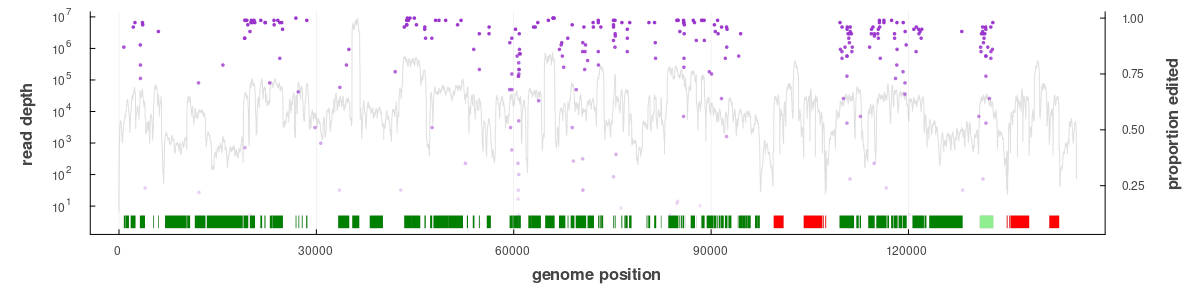

In [63]:
plot(fwdcounts .+ revcounts, color = :silver, alpha = 0.5,  xguide = "genome position", yguide="read depth", yticks=[1,10,100,1000,1e4,1e5,1e6,1e7], yscale = :log10)

cds = filter(x->x.feature == "CDS", gff)
for exon in eachrow(cds)
    plot!(rectangle(exon.stop - exon.start, 3, exon.start, 2), color=:green, lw=0)
end

cds = filter(x->x.feature == "rRNA", gff)
for exon in eachrow(cds)
    plot!(rectangle(exon.stop - exon.start, 3, exon.start, 2), color=:red, lw=0)
end

#partial ndhF
plot!(rectangle(132888 - 130846, 3, 130846, 2), color=:lightgreen, lw=0)

esites = filter(x->occursin("C to U RNA editing", x.attributes), gff)
sitepos = Int[]
editp = Float64[]
for exon in eachrow(esites)
    push!(sitepos, exon.start)
    push!(editp, parse(Float64, exon.attributes[36:39]))
end

scatter!(twinx(), sitepos, editp, ms=2, msw=0, color=:darkorchid, alpha=editp, xticks=:none, yguide="proportion edited", yticks =[0.25,0.5,0.75,1], yscale=:identity, )

plot!(left_margin = 10mm, right_margin = 10mm, bottom_margin = 10mm)

In [ ]:
savefig("cp editing.svg")